# Using PCA in Data Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from random import randint
import plotly.express as px

%matplotlib inline

Let's load a toy dataset with $500$ samples and $1000$ features.

In [2]:
data = pd.read_csv('toy_dataset.csv')

In [3]:
data.head()

feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
0  27.422157 -29.662712 -23.297163 -15.161935   0.345581   3.706750   
1   3.489482 -19.153551 -14.636424  14.688258  20.114204  13.532852   
2   4.293509  22.691579  -1.045155  -8.740350  12.401082  31.362987   
3  -2.139348  23.158754 -26.241206  19.426465   9.472049   8.453948   
4 -35.251034  27.281816 -29.470282 -21.786865  11.806822  58.655133   

   feature_6  feature_7  feature_8  feature_9  ...  feature_990  feature_991  \
0  -5.507209 -46.992476   5.175469 -47.768145  ...     7.815960    24.320965   
1  34.298084  22.982509  37.938670 -35.648144  ...    11.145527   -38.886603   
2 -18.831206 -35.384557   8.161430 -16.421762  ...    48.190331    -0.503157   
3   0.637211 -26.675984 -43.823329  11.840874  ...   -51.613076    13.278858   
4   5.375230  59.740676 -49.007717 -21.801155  ...     0.010857    20.975655   

   feature_992  feature_993  feature_994  feature_995  feature_996  \
0   -33.987522    22.306088    31.173511    31.264830     8.380699   
1    44.579337    37.308519    29.560535   -10.643331    -6.499263   
2   -21.740678    15.972237     1.122335   -45.473538    10.518065   
3   -44.179281    32.912282     4.805774     3.960836   -15.888356   
4   -21.358371    18.709369    22.362477    41.214565    -7.217724   

   feature_997  feature_998  feature_999  
0   -25.843189    36.706408   -43.480792  
1    19.921666    -3.528982    31.068739  
2    -5.818320   -29.466301   -13.676685  
3    61.384773    33.112334     5.088320  
4    31.173870    37.097532   -27.509420  

[5 rows x 1000 columns]

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Columns: 1000 entries, feature_0 to feature_999
dtypes: float64(1000)
memory usage: 3.8 MB


This is a dataset with  1000
  features.

Let's try to see if there is a pattern in the data. The following function will randomly sample 100 pairwise tuples (x,y) of features, so I can scatter-plot them.

In [5]:
def get_pairs(n = 100):
    i = 0
    tuples = []
    while i < 100:
        x = data.columns[randint(0,999)]
        y = data.columns[randint(0,999)]
        while x == y or (x,y) in tuples or (y,x) in tuples:
            y = data.columns[randint(0,999)]
        tuples.append((x,y))
        i+=1
    return tuples

In [6]:
pairs = get_pairs()

In [7]:
pairs

[('feature_566', 'feature_539'),
 ('feature_970', 'feature_733'),
 ('feature_155', 'feature_348'),
 ('feature_414', 'feature_52'),
 ('feature_957', 'feature_906'),
 ('feature_733', 'feature_595'),
 ('feature_709', 'feature_580'),
 ('feature_854', 'feature_470'),
 ('feature_272', 'feature_754'),
 ('feature_321', 'feature_125'),
 ('feature_414', 'feature_645'),
 ('feature_965', 'feature_548'),
 ('feature_423', 'feature_91'),
 ('feature_117', 'feature_863'),
 ('feature_23', 'feature_979'),
 ('feature_423', 'feature_101'),
 ('feature_791', 'feature_288'),
 ('feature_729', 'feature_120'),
 ('feature_662', 'feature_876'),
 ('feature_407', 'feature_869'),
 ('feature_696', 'feature_40'),
 ('feature_16', 'feature_114'),
 ('feature_478', 'feature_582'),
 ('feature_811', 'feature_277'),
 ('feature_861', 'feature_263'),
 ('feature_522', 'feature_702'),
 ('feature_352', 'feature_554'),
 ('feature_591', 'feature_447'),
 ('feature_69', 'feature_642'),
 ('feature_259', 'feature_372'),
 ('feature_0', '

Now let's plot them!

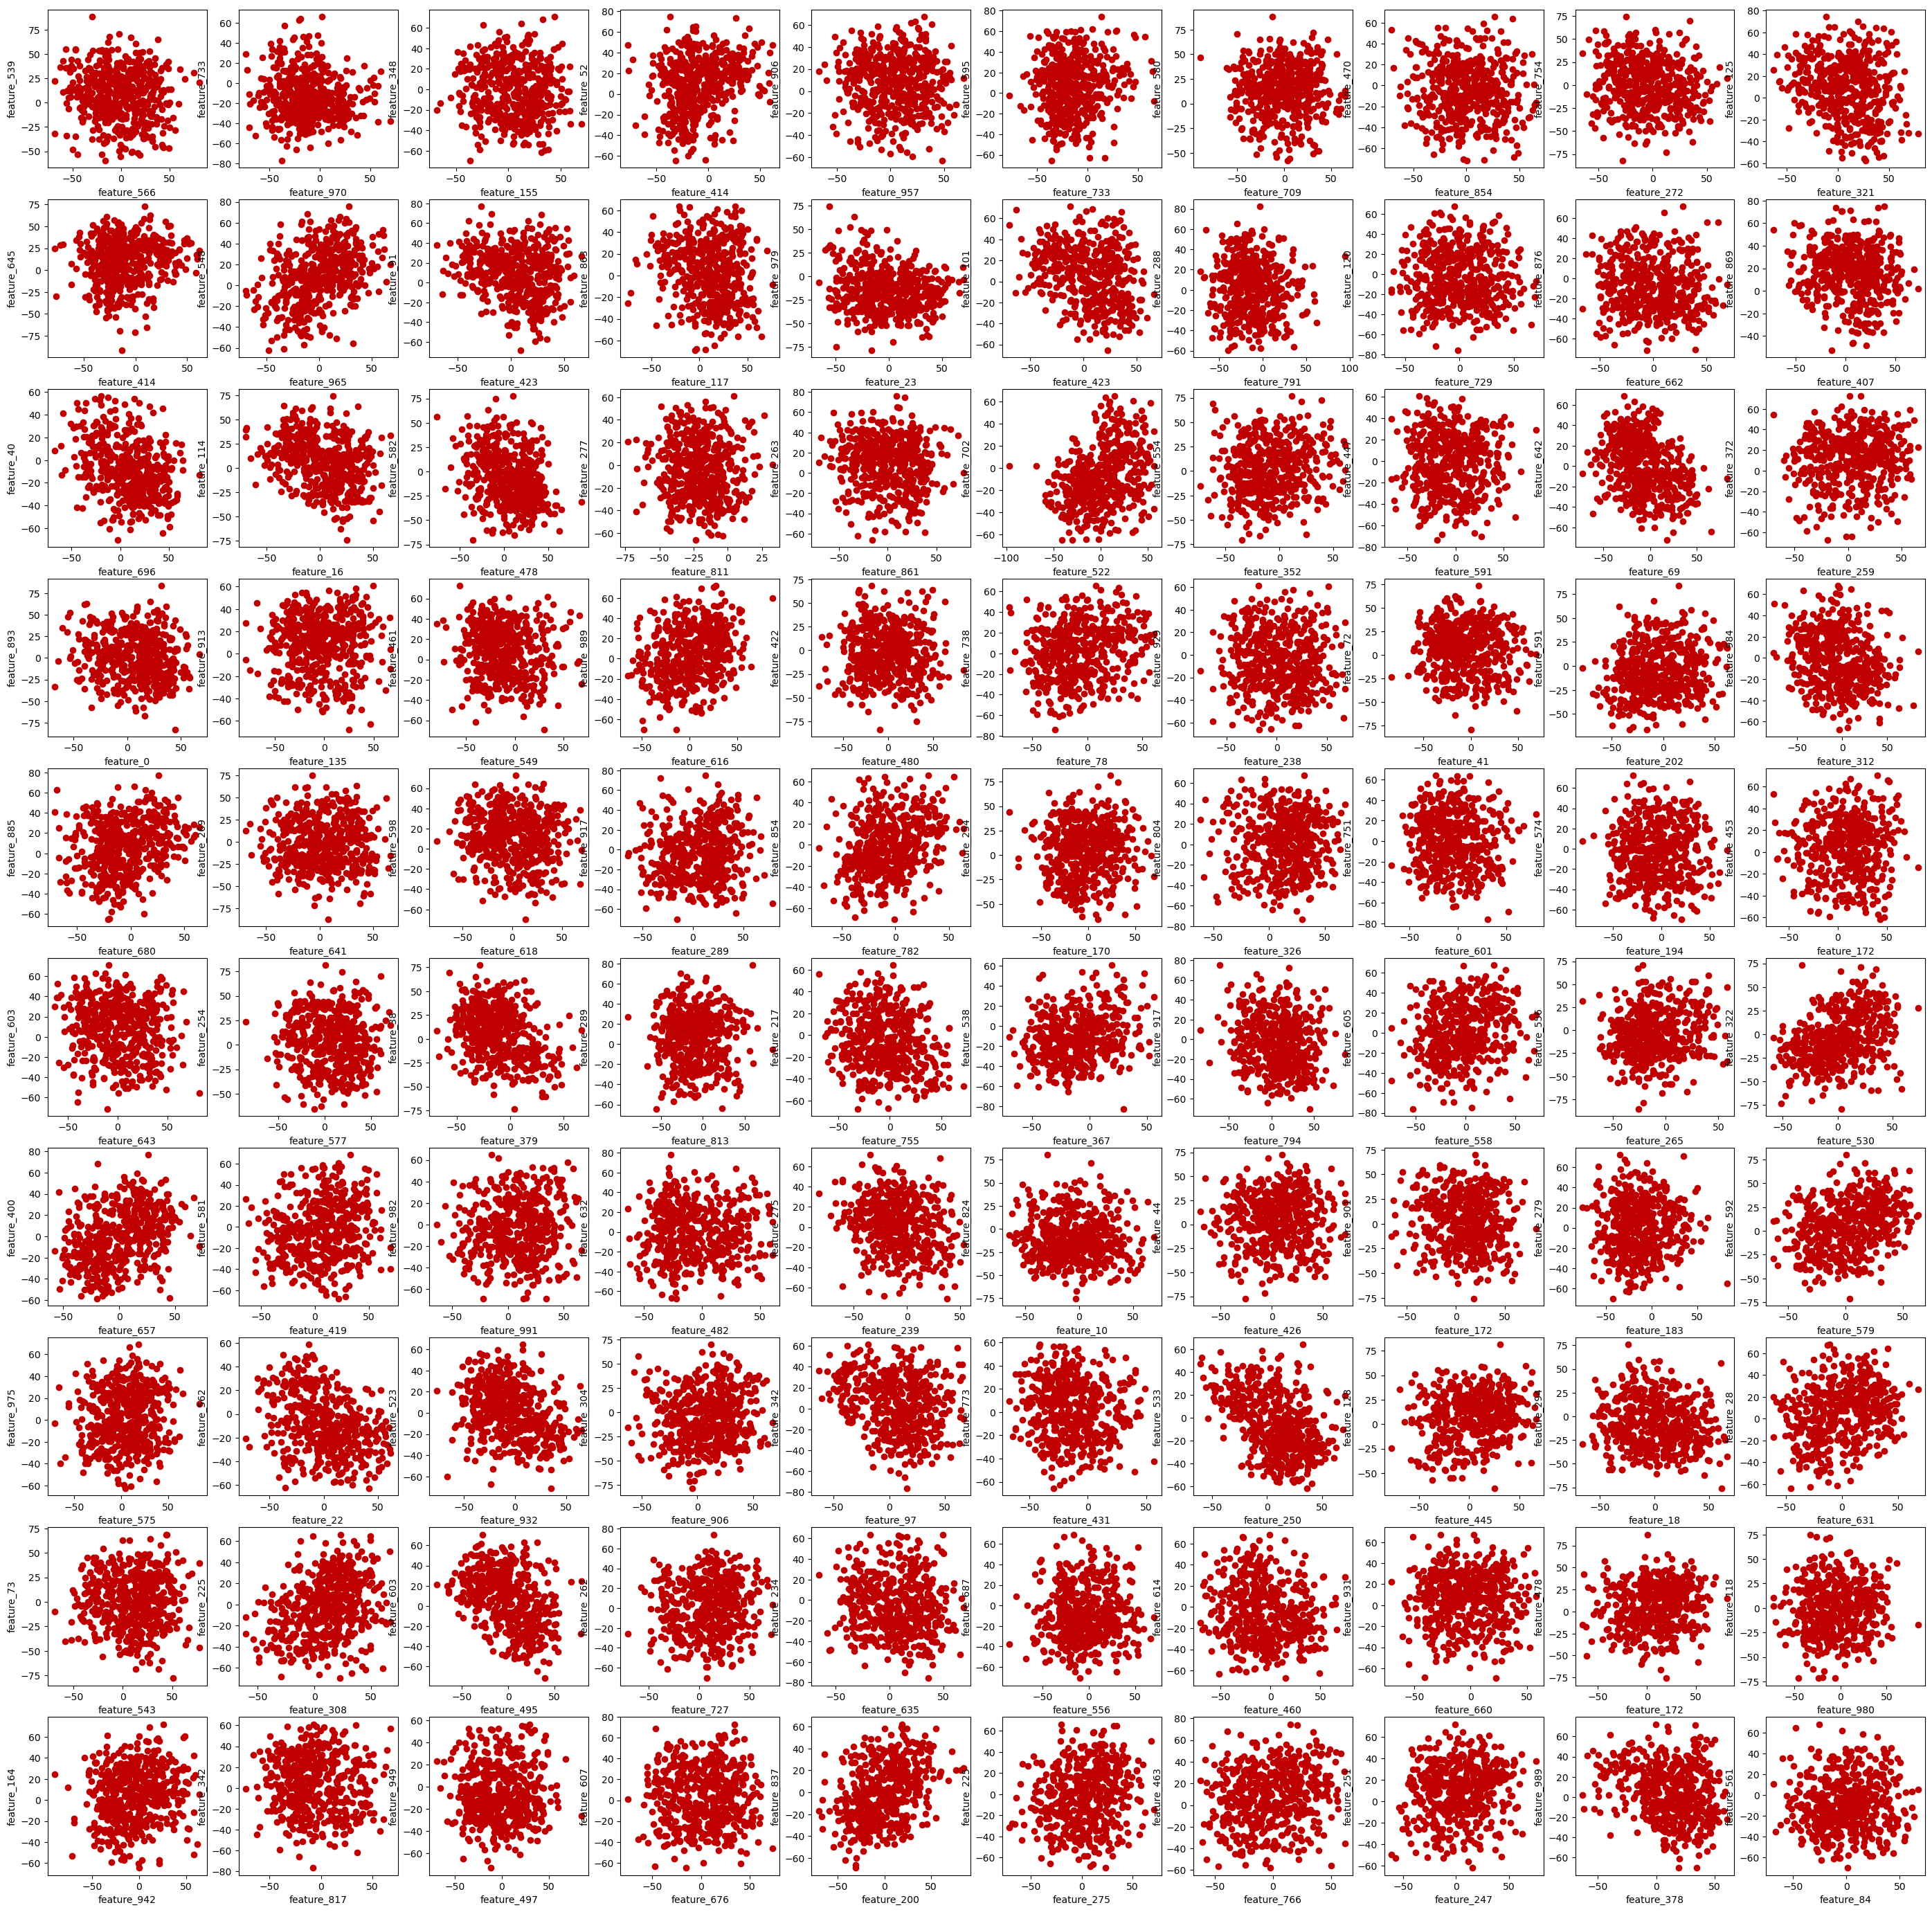

In [8]:
fig, axs = plt.subplots(10,10, figsize = (35,35))
i = 0
for rows in axs:
    for ax in rows:
        ax.scatter(data[pairs[i][0]],data[pairs[i][1]], color = "#C00000")
        ax.set_xlabel(pairs[i][0])
        ax.set_ylabel(pairs[i][1])
        i+=1

It looks like there is not much information hidden in pairwise features. Also, it is not possible to check every combination, due to the amount of features. Let's try to see the linear correlation between them.

In [9]:
corr = data.corr()

In [10]:
## This will show all the features that have correlation > 0.5 in absolute value. We remove the features 
## with correlation == 1 to remove the correlation of a feature with itself

mask = (abs(corr) > 0.5) & (abs(corr) != 1)
corr.where(mask).stack().sort_values()

feature_81   feature_657   -0.631294
feature_657  feature_81    -0.631294
feature_313  feature_4     -0.615317
feature_4    feature_313   -0.615317
feature_716  feature_1     -0.609056
                              ...   
feature_792  feature_547    0.620864
feature_35   feature_965    0.631424
feature_965  feature_35     0.631424
feature_395  feature_985    0.632593
feature_985  feature_395    0.632593
Length: 1870, dtype: float64

The maximum and minimum correlation is around 0.631 and - 0.632 which does not show too much as well.

Let's try PCA decomposition to compress the data into a 2-dimensional subspace (plane), so I can plot it as scatter plot.

In [11]:
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(data)
df_pca = pd.DataFrame(X_pca, columns = ['principal_component_1','principal_component_2'])

In [12]:
df_pca.head()

principal_component_1  principal_component_2
0             -46.235641              -1.672797
1            -210.208758             -84.068249
2             -26.352795            -127.895751
3            -116.106804            -269.368256
4            -110.183605            -279.657306

In [13]:
sns.set_style('darkgrid')

/Users/behnazmontazeri/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/behnazmontazeri/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, 'PCA decomposition')

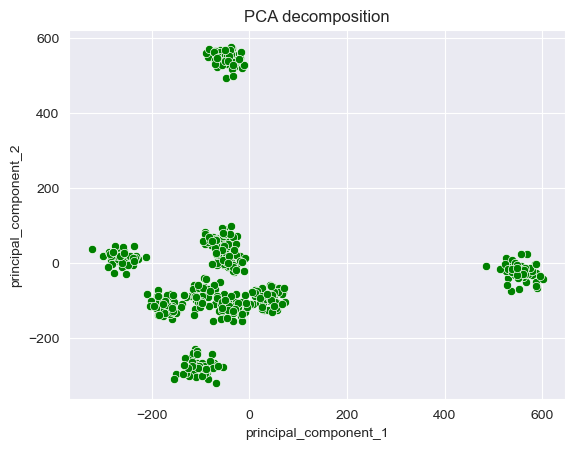

In [14]:
sns.scatterplot(data=df_pca, x='principal_component_1', y='principal_component_2', color='g')
plt.xlabel('principal_component_1')
plt.ylabel('principal_component_2')
plt.title('PCA decomposition')

This is great! I can see well defined clusters. 

In [15]:
sum(pca.explained_variance_ratio_)


0.14572843555106268

And we preserved only around 14.6% of the variance!

Quite impressive! I can clearly see clusters in my data, something that I could not see before.
If I run a PCA to plot 3 dimensions, I will get more information from data.

In [16]:
pca_3 = PCA(n_components = 3).fit(data)
X_t = pca_3.transform(data)
df_pca_3 = pd.DataFrame(X_t,columns = ['principal_component_1','principal_component_2','principal_component_3'])

In [17]:
df_pca_3

principal_component_1  principal_component_2  principal_component_3
0               -46.235641              -1.672797              38.410180
1              -210.208758             -84.068249            -275.195623
2               -26.352795            -127.895751             166.058699
3              -116.106804            -269.368256            -286.123911
4              -110.183605            -279.657306            -308.823198
..                     ...                    ...                    ...
495            -196.308519            -114.669122            -261.337818
496             -63.968829            -275.636961            -297.428343
497             -28.397252             -19.327176               4.060551
498            -257.519479              25.058819             443.317507
499             -20.590474             543.672802            -136.175103

[500 rows x 3 columns]

In [18]:
fig = px.scatter_3d(df_pca_3, x = 'principal_component_1', y = 'principal_component_2', z = 'principal_component_3').update_traces(marker = dict(color = 'green'))

In [19]:
fig.show()

In [20]:
sum(pca_3.explained_variance_ratio_)

0.2080625781609324

Now we preserved 20% of the variance and we can clearly see clusters.